In [ ]:
# importing dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import to_categorical
import keras

In [ ]:

##### PLEASE SET THESE CAREFULLY refer :instructions.txt

#INPUT_DIR = "/gdrive/Shareddrives/DLNN_ProjC1/output/new_data_sampling"
#OUTPUT_DIR = "/gdrive/Shareddrives/DLNN_ProjC1/output/final_c2_models2"

# OUTPUT_DIR="/Users/soham/Desktop/ECE 542/Project/Proj_C/Data/Train model1 /"
# INPUT_DIR="/Users/soham/Desktop/ECE 542/Project/Proj_C/Data/Data_sampl/"
#####

OUTPUT_DIR="/Users/soham/Desktop/ECE 542/Project/Proj_C/Data/Train model1 /"
INPUT_DIR="/Users/soham/Desktop/ECE 542/Project/Proj_C/Data/Data_sampl/"
#####


# some constants
WINDOW_SIZE = 160
#NUMBER_MODELS = 21
NUMBER_MODELS = 11

In [ ]:
# some utility functions 

def normalize_z(x, avg, std_dev, smooth = 0.0001):
  return (x-avg) / (std_dev + smooth)

def normalize_mm(x, minn, maxx, smooth = 0.0001):
  return 2*(x-(minn+maxx)/2) / (maxx - minn + smooth)


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))

        val = int(val / 1000)
        return '{p:.2f}%  ({v:d}K)'.format(p=pct,v=val)
    return my_autopct

# Defining a function for plotting training and validation learning curves
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['categorical_accuracy'], color='blue', label='train')
    plt.plot(history.history['val_categorical_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

def distribution_pie(dataset, title):
  aug_0 = np.where(dataset==0)[0].shape[0]
  aug_1 = np.where(dataset==1)[0].shape[0]
  aug_2 = np.where(dataset==2)[0].shape[0]
  aug_3 = np.where(dataset==3)[0].shape[0]

  print(aug_0, aug_1, aug_2, aug_3)
  plt.figure(figsize=(6, 6))
  plt.title(title)
  plt.pie([aug_0, aug_1, aug_2, aug_3], labels = ["zero", "one", "two", "three"],
          labeldistance= True, autopct=make_autopct([aug_0, aug_1, aug_2, aug_3]), explode = (0.1, 0.1, 0.1, 0.1))
  plt.legend()

  plt.show()

1269098 791736 868888 1218118


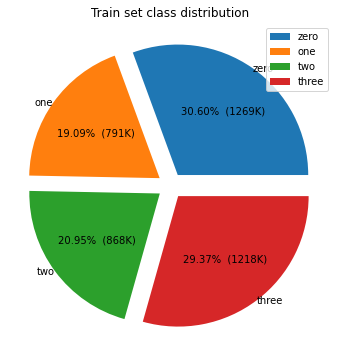

553912 335346 362966 525536


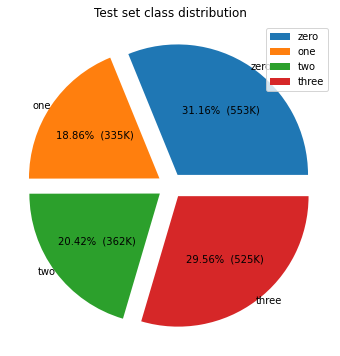

In [ ]:
# load data
from sklearn.model_selection import  train_test_split


dataset = np.load(os.path.join(INPUT_DIR, "dataset.npy"))
x, y = dataset[..., :6], dataset[..., -1].astype(np.uint8)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=33)


mean = np.load(os.path.join(INPUT_DIR, "x_mean.npy"))
std = np.load(os.path.join(INPUT_DIR, "x_stddev.npy"))


x_train = normalize_z(x_train, mean, std)
x_test = normalize_z(x_test, mean, std)

distribution_pie(y_train, "Train set class distribution")
distribution_pie(y_test, "Test set class distribution")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

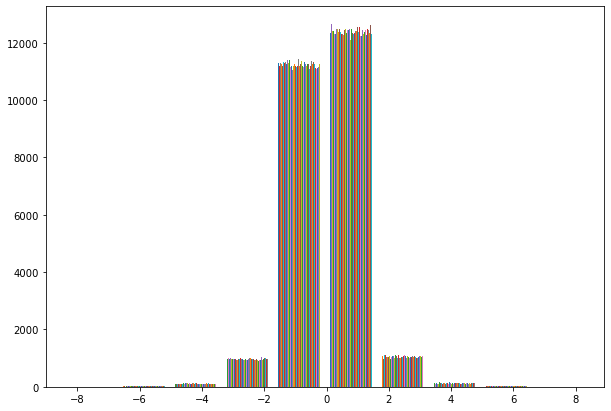

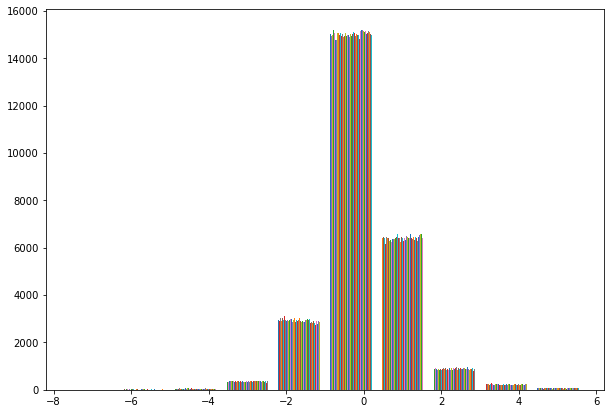

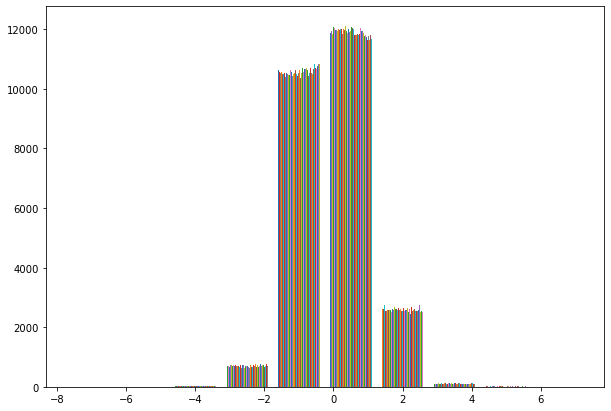

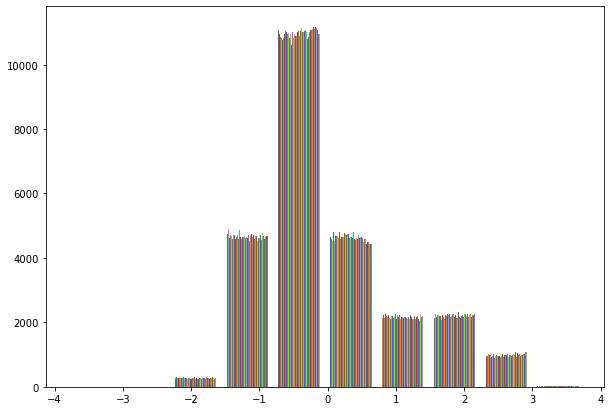

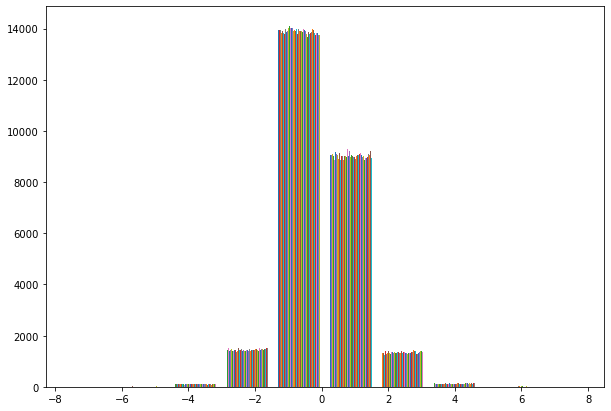

<function matplotlib.pyplot.show(close=None, block=None)>

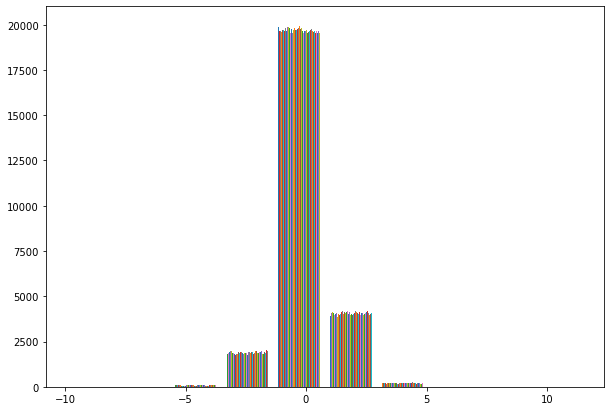

In [ ]:

# seeing how the data looks
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 0])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 1])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 2])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 3])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 4])
plt.show()
plt.figure(figsize=(10, 7))
plt.hist(x_train[:, :, 5])
plt.show

In [ ]:
# importing stuff required to build the model
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input, Conv1D, Dropout, BatchNormalization, MaxPooling1D, UpSampling1D

In [ ]:
#dropout before batch-norm: https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout

def make_model(input_shape, num_classes):
    input_dropout_rate = 0.1
    dropout_rate = 0.25
    input_layer = Input(input_shape)

    conv1 = Conv1D(filters=16, kernel_size=3, padding="same", activation = "relu")(input_layer)
    conv1 = Dropout(input_dropout_rate)(conv1)
    # conv1 = Conv1D(filters=16, kernel_size=3, padding="same", activation = "relu")(conv1)
    # conv1 = Dropout(input_dropout_rate)(conv1)
    # conv1 = BatchNormalization()(conv1)
    conv1 = MaxPooling1D(pool_size =2)(conv1)

    conv2 = Conv1D(filters=32, kernel_size=3, padding="same", activation = "relu")(conv1)
    conv2 = Dropout(dropout_rate)(conv2)
    # conv2 = Conv1D(filters=32, kernel_size=3, padding="same", activation = "relu")(conv2)
    # conv2 = Dropout(dropout_rate)(conv2)
    
    # conv2 = BatchNormalization()(conv2)
    conv2 = MaxPooling1D(pool_size =2)(conv2)

    conv3 = Conv1D(filters=64, kernel_size=3, padding="same", activation = "relu")(conv2)
    conv3 = Dropout(dropout_rate)(conv3)
    # conv3 = Conv1D(filters=64, kernel_size=3, padding="same", activation = "relu")(conv3)
    # conv3 = Dropout(dropout_rate)(conv3)


    # conv3 = BatchNormalization()(conv3)
    conv3 = MaxPooling1D(pool_size =2)(conv3)


    # conv4 = Conv1D(filters=200, kernel_size=3, padding="same", activation = "relu")(conv3)
    # conv4 = Dropout(dropout_rate)(conv4)
    # # conv4 = BatchNormalization()(conv4)
    # conv4 = MaxPooling1D(pool_size =2)(conv4)

    # deconv4 = Conv1D(filters=200, kernel_size=3, padding = "same", activation="relu")(conv4)
    # deconv4 = Dropout(dropout_rate)(deconv4)
    # # deconv4 = BatchNormalization()(deconv4)
    # deconv4 = UpSampling1D(size =2)(deconv4)

    deconv3 = Conv1D(filters=64, kernel_size=3, padding = "same", activation="relu")(conv3)
    deconv3 = Dropout(dropout_rate)(deconv3)
    # deconv3 = Conv1D(filters=64, kernel_size=3, padding = "same", activation="relu")(deconv3)
    # deconv3 = Dropout(dropout_rate)(deconv3)
    
    # deconv3 = BatchNormalization()(deconv3)
    deconv3 = UpSampling1D(size =2)(deconv3)

    deconv2 = Conv1D(filters=32, kernel_size=3, padding = "same", activation="relu")(deconv3)
    deconv2 = Dropout(dropout_rate)(deconv2)
    # deconv2 = Conv1D(filters=32, kernel_size=3, padding = "same", activation="relu")(deconv2)
    # deconv2 = Dropout(dropout_rate)(deconv2)
    
    # deconv2 = BatchNormalization()(deconv2)
    deconv2 = UpSampling1D(size =2)(deconv2)

    deconv1 = Conv1D(filters=16, kernel_size=3, padding = "same", activation="relu")(deconv2)
    deconv1 = Dropout(dropout_rate)(deconv1)
    # deconv1 = Conv1D(filters=16, kernel_size=3, padding = "same", activation="relu")(deconv1)
    # deconv1 = Dropout(dropout_rate)(deconv1)

    # deconv1 = BatchNormalization()(deconv1)
    deconv1 = UpSampling1D(size =2)(deconv1)

    output_layer = Conv1D(filters = 4, kernel_size = 3, padding = "same", activation="softmax")(deconv1)
    
    return Model(inputs=input_layer, outputs=output_layer)

In [ ]:
import tensorflow as tf

# custom weighted loss function (weighted categorical cross entropy)
def weighted_crossentropy(y_true, y_pred):
  EPSILON = 0.0001

  y_t = tf.math.multiply(tf.broadcast_to(tf.constant([2, 1, 1, 2], dtype = float), tf.shape(y_true)) , y_true)
  h_t = tf.math.multiply(tf.broadcast_to(tf.constant([1, 1, 1, 1], dtype = float), tf.shape(y_pred)) , y_pred)

  return tf.math.reduce_mean(- tf.math.multiply(y_t  , tf.math.log(tf.add(h_t, EPSILON))))

In [ ]:
# common training hyper-parameters

epochs = 200
batch_size = 1024

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=False),
    # keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, min_lr=0.00001, verbose=1)
]

iteration: 0 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0931 - categorical_accuracy: 0.9208


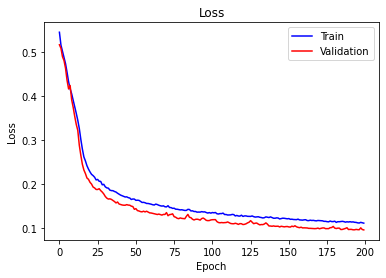

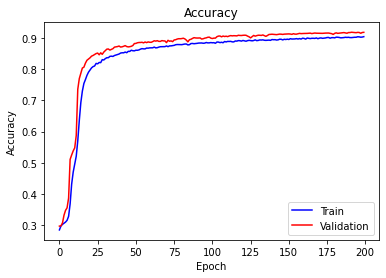

[[499659   8519   9116  36618]
 [ 19285 315533     58    470]
 [ 14326    188 348079    373]
 [ 50583   1033    310 473610]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88    553912
           1       0.97      0.94      0.96    335346
           2       0.97      0.96      0.97    362966
           3       0.93      0.90      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.93      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 1 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0913 - categorical_accuracy: 0.9226


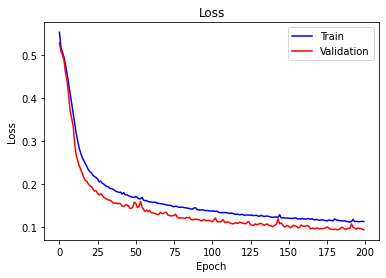

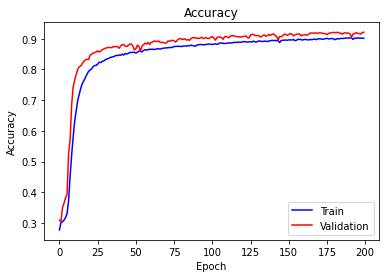

[[498409  10178   8833  36492]
 [ 17579 317164     83    520]
 [ 15090    136 347419    321]
 [ 46790   1252    277 477217]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88    553912
           1       0.96      0.95      0.96    335346
           2       0.97      0.96      0.97    362966
           3       0.93      0.91      0.92    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.93      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 2 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0935 - categorical_accuracy: 0.9189


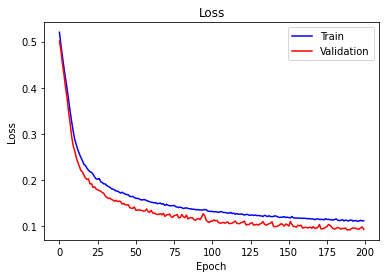

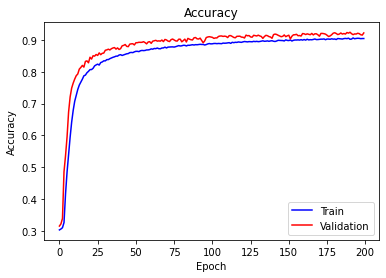

[[506150   8165   8430  31167]
 [ 20275 314528     45    498]
 [ 16033    189 346432    312]
 [ 58188    655    213 466480]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88    553912
           1       0.97      0.94      0.95    335346
           2       0.98      0.95      0.96    362966
           3       0.94      0.89      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.92      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 3 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0932 - categorical_accuracy: 0.9184


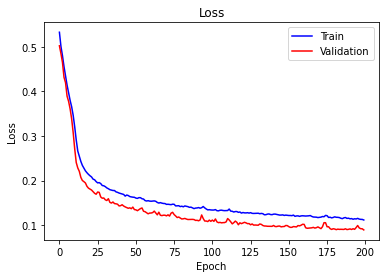

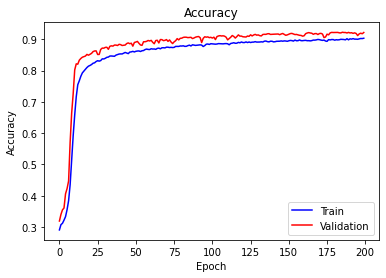

[[505075   6988   8013  33836]
 [ 22013 312683     84    566]
 [ 16009    142 346543    272]
 [ 56213    667    294 468362]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88    553912
           1       0.98      0.93      0.95    335346
           2       0.98      0.95      0.97    362966
           3       0.93      0.89      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.92      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 4 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0937 - categorical_accuracy: 0.9194


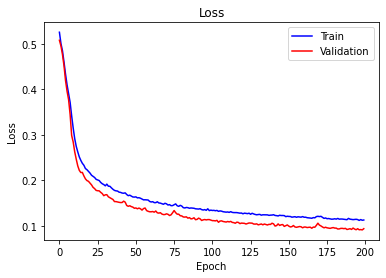

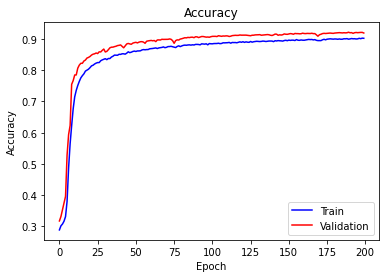

[[484270   9898   8842  50902]
 [ 18403 316179     88    676]
 [ 14702    205 347805    254]
 [ 38095   1012    264 486165]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    553912
           1       0.97      0.94      0.95    335346
           2       0.97      0.96      0.97    362966
           3       0.90      0.93      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.93      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 5 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0955 - categorical_accuracy: 0.9183


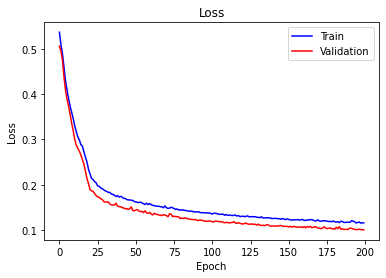

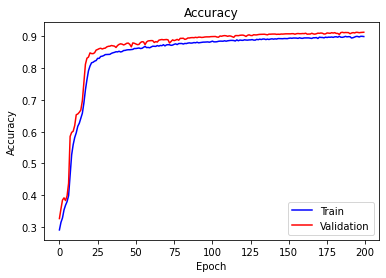

[[499907  10296   9426  34283]
 [ 18670 316179     65    432]
 [ 15504    177 346949    336]
 [ 54199   1561    331 469445]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88    553912
           1       0.96      0.94      0.95    335346
           2       0.97      0.96      0.96    362966
           3       0.93      0.89      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.92      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 6 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 2ms/step - loss: 0.0948 - categorical_accuracy: 0.9196


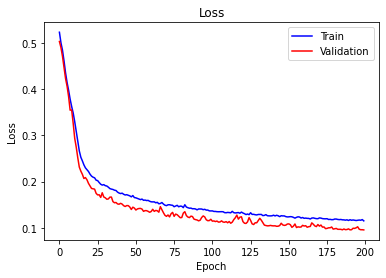

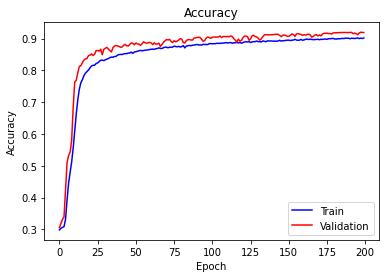

[[496486   8864   9122  39440]
 [ 18558 316351     75    362]
 [ 14894    299 347438    335]
 [ 50142    656    226 474512]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88    553912
           1       0.97      0.94      0.96    335346
           2       0.97      0.96      0.97    362966
           3       0.92      0.90      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.92      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 7 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0988 - categorical_accuracy: 0.9145


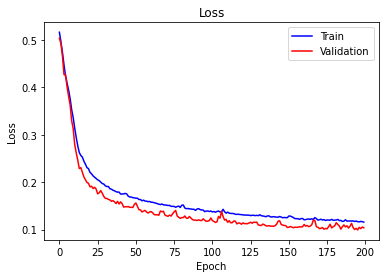

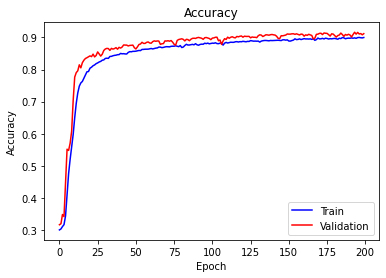

[[505889  10097   8299  29627]
 [ 17630 317096     93    527]
 [ 17312    186 345189    279]
 [ 65979   1557    341 457659]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87    553912
           1       0.96      0.95      0.95    335346
           2       0.98      0.95      0.96    362966
           3       0.94      0.87      0.90    525536

    accuracy                           0.91   1777760
   macro avg       0.93      0.92      0.92   1777760
weighted avg       0.92      0.91      0.92   1777760

iteration: 8 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 2ms/step - loss: 0.0937 - categorical_accuracy: 0.9198


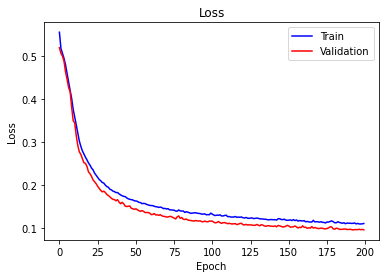

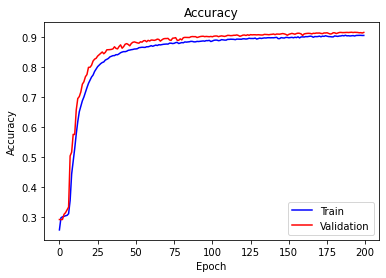

[[502689   8549   7562  35112]
 [ 19365 315233    180    568]
 [ 16903    147 345544    372]
 [ 52788    858    241 471649]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88    553912
           1       0.97      0.94      0.96    335346
           2       0.98      0.95      0.96    362966
           3       0.93      0.90      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.92      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 9 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0983 - categorical_accuracy: 0.9114


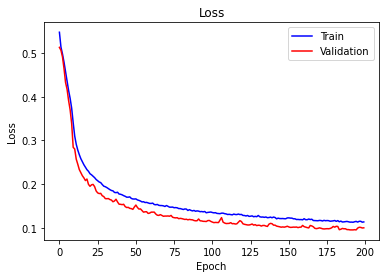

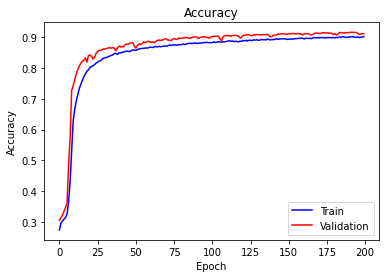

[[515295   6773   7506  24338]
 [ 23054 311933     88    271]
 [ 18444    128 344208    186]
 [ 76057    539    103 448837]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87    553912
           1       0.98      0.93      0.95    335346
           2       0.98      0.95      0.96    362966
           3       0.95      0.85      0.90    525536

    accuracy                           0.91   1777760
   macro avg       0.93      0.92      0.92   1777760
weighted avg       0.92      0.91      0.91   1777760

iteration: 10 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0931 - categorical_accuracy: 0.9202


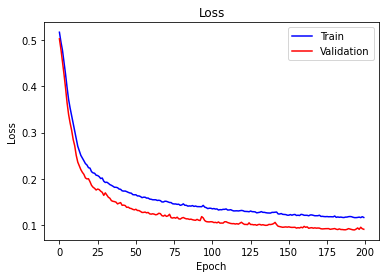

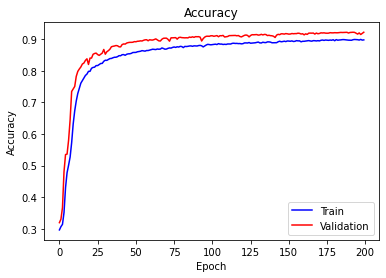

[[504377   9578   7356  32601]
 [ 17867 316780     61    638]
 [ 16017    166 346474    309]
 [ 56081    980    298 468177]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88    553912
           1       0.97      0.94      0.96    335346
           2       0.98      0.95      0.97    362966
           3       0.93      0.89      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.93      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 11 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 4ms/step - loss: 0.0964 - categorical_accuracy: 0.9183


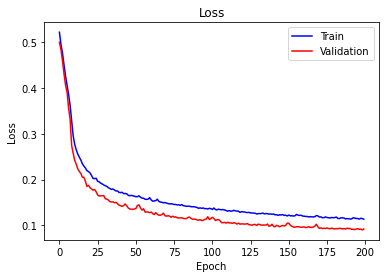

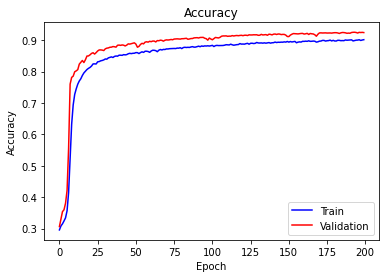

[[500763  10805   9864  32480]
 [ 17636 317241    110    359]
 [ 13570    161 348935    300]
 [ 57931   1234    710 465661]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88    553912
           1       0.96      0.95      0.95    335346
           2       0.97      0.96      0.97    362966
           3       0.93      0.89      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.92      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 12 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0910 - categorical_accuracy: 0.9221


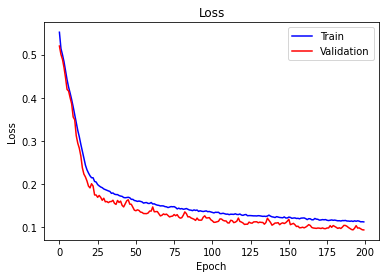

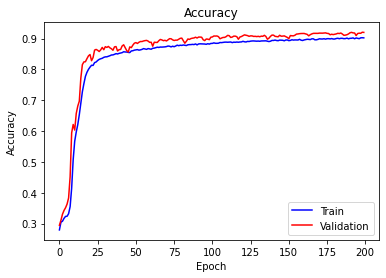

[[501726   7791   7511  36884]
 [ 19823 314884     56    583]
 [ 16684    272 345812    198]
 [ 47142   1395    122 476877]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88    553912
           1       0.97      0.94      0.95    335346
           2       0.98      0.95      0.97    362966
           3       0.93      0.91      0.92    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.93      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 13 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0945 - categorical_accuracy: 0.9197


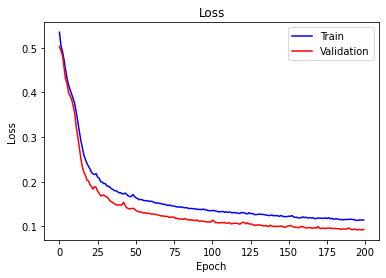

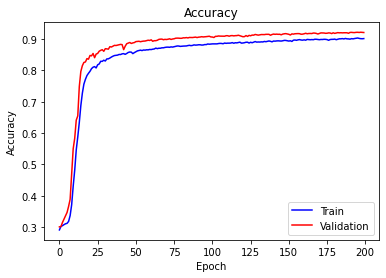

[[488678   9279   8444  47511]
 [ 17033 317868     73    372]
 [ 15510    134 346975    347]
 [ 42957    827    230 481522]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87    553912
           1       0.97      0.95      0.96    335346
           2       0.98      0.96      0.97    362966
           3       0.91      0.92      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.93      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 14 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.1006 - categorical_accuracy: 0.9111


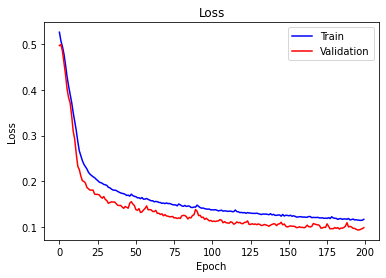

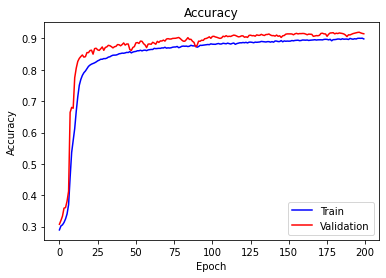

[[511181   8861   8498  25372]
 [ 21017 313852    136    341]
 [ 16330    213 346331     92]
 [ 76049    780    434 448273]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87    553912
           1       0.97      0.94      0.95    335346
           2       0.97      0.95      0.96    362966
           3       0.95      0.85      0.90    525536

    accuracy                           0.91   1777760
   macro avg       0.93      0.92      0.92   1777760
weighted avg       0.92      0.91      0.91   1777760

iteration: 15 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0932 - categorical_accuracy: 0.9189


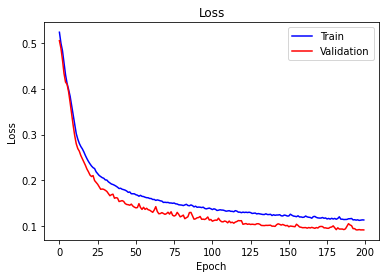

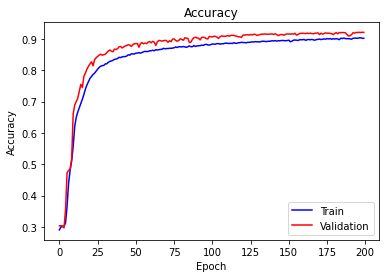

[[497427   9868   7396  39221]
 [ 18170 316733     75    368]
 [ 18890    122 343599    355]
 [ 48461   1070    198 475807]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88    553912
           1       0.97      0.94      0.96    335346
           2       0.98      0.95      0.96    362966
           3       0.92      0.91      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.92      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 16 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0914 - categorical_accuracy: 0.9201


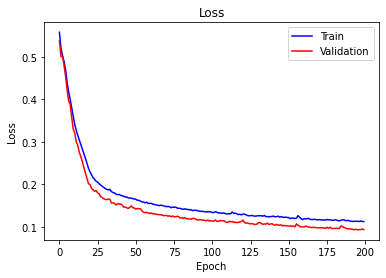

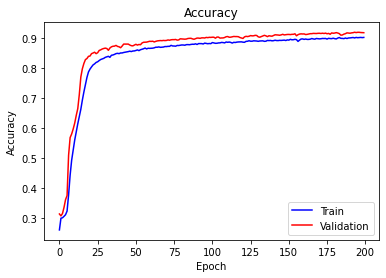

[[499874   7643   6860  39535]
 [ 20879 313601    151    715]
 [ 18036    116 344382    432]
 [ 46813    655    149 477919]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88    553912
           1       0.97      0.94      0.95    335346
           2       0.98      0.95      0.96    362966
           3       0.92      0.91      0.92    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.92      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 17 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0948 - categorical_accuracy: 0.9187


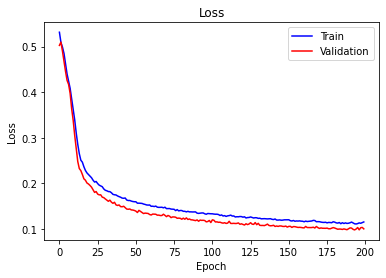

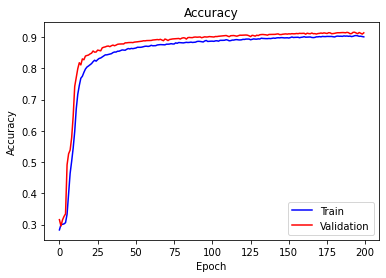

[[500848   7755   8435  36874]
 [ 21620 313190    205    331]
 [ 16289    111 346491     75]
 [ 51552    801    402 472781]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88    553912
           1       0.97      0.93      0.95    335346
           2       0.97      0.95      0.96    362966
           3       0.93      0.90      0.91    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.92      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 18 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0887 - categorical_accuracy: 0.9239


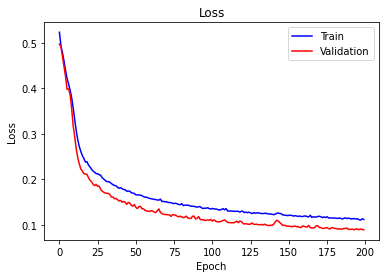

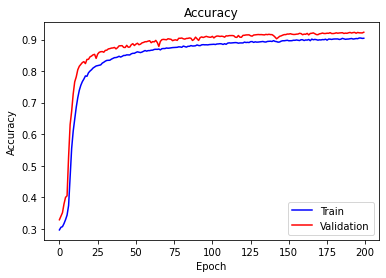

[[498543   9045   7964  38360]
 [ 17700 317038     90    518]
 [ 15544    184 346867    371]
 [ 43977   1442    164 479953]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88    553912
           1       0.97      0.95      0.96    335346
           2       0.98      0.96      0.97    362966
           3       0.92      0.91      0.92    525536

    accuracy                           0.92   1777760
   macro avg       0.93      0.93      0.93   1777760
weighted avg       0.92      0.92      0.92   1777760

iteration: 19 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.1039 - categorical_accuracy: 0.9112


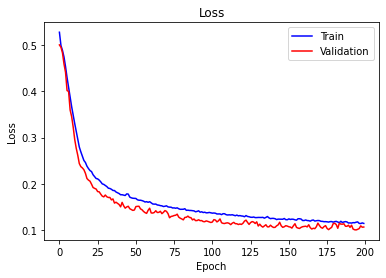

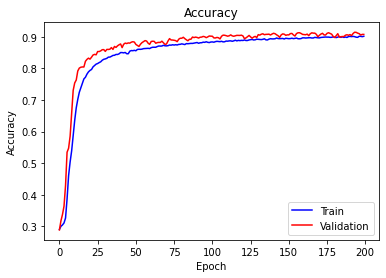

[[512097   9703   8575  23537]
 [ 18649 316482     49    166]
 [ 16280    184 346414     88]
 [ 77849   2422    400 444865]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87    553912
           1       0.96      0.94      0.95    335346
           2       0.97      0.95      0.96    362966
           3       0.95      0.85      0.89    525536

    accuracy                           0.91   1777760
   macro avg       0.93      0.92      0.92   1777760
weighted avg       0.92      0.91      0.91   1777760

iteration: 20 	data: (10369, 160, 6) (10369, 160, 4)
348/348 [==============================] - 1s 3ms/step - loss: 0.0997 - categorical_accuracy: 0.9134


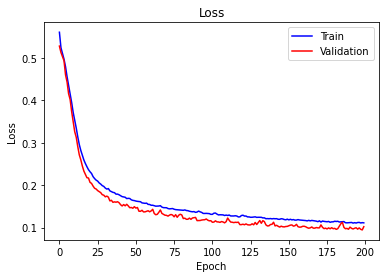

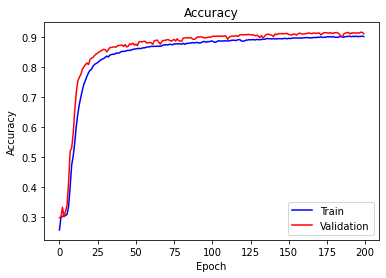

[[512227   8015   8502  25168]
 [ 20170 314940     69    167]
 [ 15432    105 347280    149]
 [ 74572   1175    489 449300]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87    553912
           1       0.97      0.94      0.95    335346
           2       0.97      0.96      0.97    362966
           3       0.95      0.85      0.90    525536

    accuracy                           0.91   1777760
   macro avg       0.93      0.92      0.92   1777760
weighted avg       0.92      0.91      0.91   1777760



In [ ]:
#training models

from sklearn.metrics import  confusion_matrix, classification_report

for model_number in range(NUMBER_MODELS):
  temp_x, _, temp_y, _ = train_test_split(x_train, y_train, train_size = 0.4, random_state = model_number)
  
  print("iteration:", model_number, "\tdata:", temp_x.shape, temp_y.shape)

  temp_model = make_model(input_shape=[WINDOW_SIZE, 6], num_classes=4)

  temp_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=weighted_crossentropy,
    metrics=["categorical_accuracy"],
    
  )

  temp_history = temp_model.fit(
    temp_x,
    temp_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split = 0.2,
    verbose=0,
    shuffle = True
  )

  temp_model.evaluate(temp_x, temp_y)
  temp_model.evaluate(x_test, y_test)

  plot_history(temp_history)

  y_test_pred = temp_model.predict(x_test)
  y_test_pred_sparse = np.argmax(y_test_pred, axis = -1).reshape(-1)
  y_test_sparse = np.argmax(y_test, axis = -1).reshape(-1)


  print(confusion_matrix(y_test_sparse, y_test_pred_sparse))
  print(classification_report(y_test_sparse, y_test_pred_sparse))
  
  temp_model.save(os.path.join(OUTPUT_DIR, "model_"+str(model_number)+".h5"))